In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load






import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ghthjhjgg/Data_Description.xlsx
/kaggle/input/ghthjhjgg/sample documentation.docx
/kaggle/input/ghthjhjgg/Problem Statement.docx
/kaggle/input/ghthjhjgg/Pointers.txt
/kaggle/input/ghthjhjgg/train.csv
/kaggle/input/ghthjhjgg/test.csv


In [18]:
df=pd.read_csv('/kaggle/input/ghthjhjgg/train.csv')

In [19]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [20]:
df.info

<bound method DataFrame.info of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

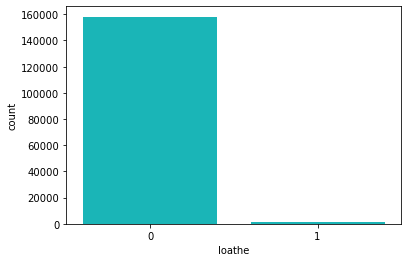

 real-0 and fake-1 
 0    158166
1      1405
Name: loathe, dtype: int64


In [22]:
sns.countplot('loathe', data=df, color="darkturquoise")
plt.show()
print(' real-0 and fake-1','\n', df.loathe.value_counts())

In [23]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [24]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
import string
import nltk
warnings.filterwarnings('ignore')

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [26]:
df['cleanedtest']=df['comment_text'].apply(lambda x: ( x.lower()))

In [27]:
df['cleanedtest'] = df['cleanedtest'].str.replace(r'[^\w\d\s]', '')


# Replace whitespace between terms with a single space
df['cleanedtest'] = df['cleanedtest'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['cleanedtest'] = df['cleanedtest'].str.replace(r'^\s+|\s+?$!@#$%^&*_-+=:;"''"', '')

In [28]:
stop_words = set(stopwords.words('english') )

df['cleanedtest'] = df['cleanedtest'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [29]:
df['neg']=df['comment_text'].apply(lambda x: analyser.polarity_scores(x)['neg'])

In [30]:
df['neu']=df['comment_text'].apply(lambda x: analyser.polarity_scores(x)['neu'])
df['pos']=df['comment_text'].apply(lambda x: analyser.polarity_scores(x)['pos'])
df['compound']=df['comment_text'].apply(lambda x: analyser.polarity_scores(x)['compound'])

In [31]:
df.head(8)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleanedtest,neg,neu,pos,compound
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,0.000,0.897,0.103,0.5574
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww matches background colour im seemingly st...,0.099,0.743,0.158,0.2942
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really trying edit war guy constant...,0.083,0.849,0.068,-0.1779
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggestions improvement wondere...,0.022,0.916,0.062,0.5106
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats,0.000,0.663,0.337,0.6808
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,congratulations well use tools well talk,0.000,0.464,0.536,0.7964
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,cocksucker piss around work,0.531,0.469,0.000,-0.7783
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,vandalism matt shirvington article reverted pl...,0.129,0.773,0.099,-0.1779


In [32]:

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [33]:

naive = MultinomialNB()
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm = SVC(random_state = 1)
model = LogisticRegression()
z=[svm,model,rf,naive]
z1=[model,rf]

Final score LogisticRegression() = > 0.9572356052440277
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     36078
           1       0.84      0.68      0.75      3815

    accuracy                           0.96     39893
   macro avg       0.91      0.83      0.86     39893
weighted avg       0.95      0.96      0.96     39893



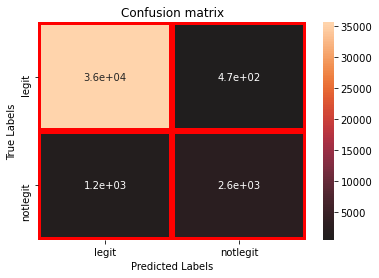

Final score RandomForestClassifier(random_state=42) = > 0.9528238036748302
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     36078
           1       0.90      0.57      0.70      3815

    accuracy                           0.95     39893
   macro avg       0.93      0.78      0.84     39893
weighted avg       0.95      0.95      0.95     39893



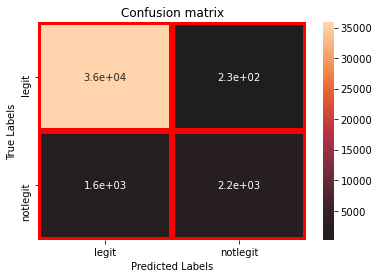

Final score LogisticRegression() = > 0.9900233123605645
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39487
           1       0.52      0.21      0.30       406

    accuracy                           0.99     39893
   macro avg       0.76      0.60      0.65     39893
weighted avg       0.99      0.99      0.99     39893



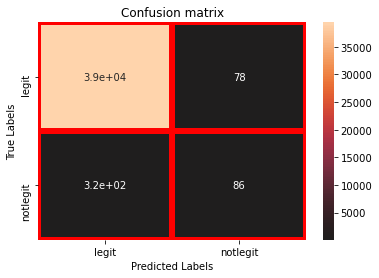

Final score RandomForestClassifier(random_state=42) = > 0.9901235805780463
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39487
           1       0.60      0.09      0.16       406

    accuracy                           0.99     39893
   macro avg       0.79      0.55      0.58     39893
weighted avg       0.99      0.99      0.99     39893



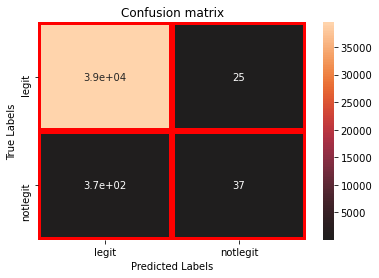

Final score LogisticRegression() = > 0.9779911262627529
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     37750
           1       0.87      0.69      0.77      2143

    accuracy                           0.98     39893
   macro avg       0.93      0.84      0.88     39893
weighted avg       0.98      0.98      0.98     39893



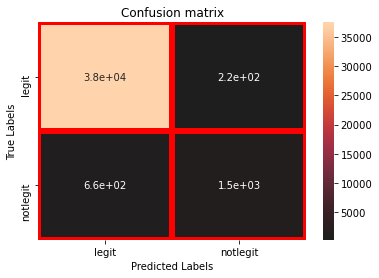

Final score RandomForestClassifier(random_state=42) = > 0.9764119018374151
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     37750
           1       0.92      0.62      0.74      2143

    accuracy                           0.98     39893
   macro avg       0.95      0.81      0.86     39893
weighted avg       0.98      0.98      0.97     39893



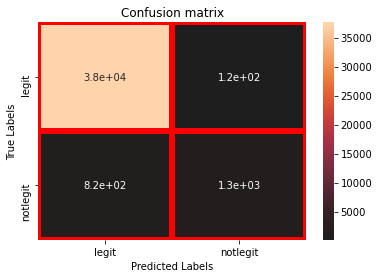

Final score LogisticRegression() = > 0.997217556964881
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39788
           1       0.44      0.23      0.30       105

    accuracy                           1.00     39893
   macro avg       0.72      0.61      0.65     39893
weighted avg       1.00      1.00      1.00     39893



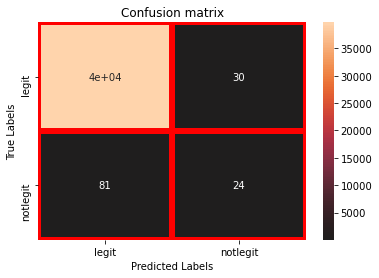

Final score RandomForestClassifier(random_state=42) = > 0.9973679592911037
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39788
           1       0.50      0.06      0.10       105

    accuracy                           1.00     39893
   macro avg       0.75      0.53      0.55     39893
weighted avg       1.00      1.00      1.00     39893



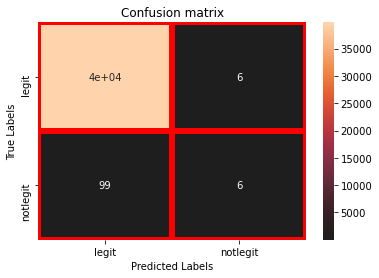

Final score LogisticRegression() = > 0.9655578672950141
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37882
           1       0.76      0.46      0.58      2011

    accuracy                           0.97     39893
   macro avg       0.87      0.73      0.78     39893
weighted avg       0.96      0.97      0.96     39893



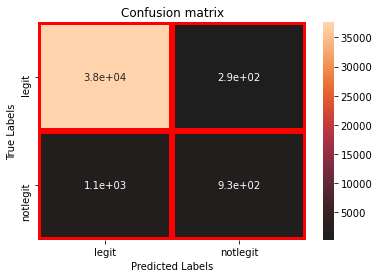

Final score RandomForestClassifier(random_state=42) = > 0.96816484094954
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37882
           1       0.81      0.48      0.60      2011

    accuracy                           0.97     39893
   macro avg       0.89      0.74      0.79     39893
weighted avg       0.96      0.97      0.96     39893



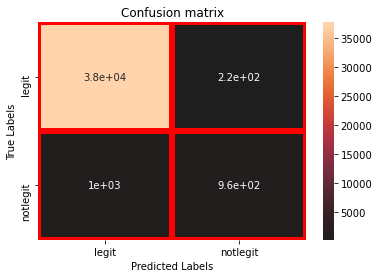

Final score LogisticRegression() = > 0.9908003910460482
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39536
           1       0.45      0.12      0.19       357

    accuracy                           0.99     39893
   macro avg       0.72      0.56      0.59     39893
weighted avg       0.99      0.99      0.99     39893



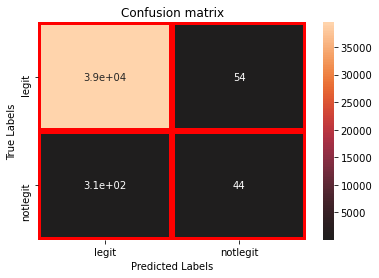

Final score RandomForestClassifier(random_state=42) = > 0.9915022685684205
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     39536
           1       0.67      0.10      0.18       357

    accuracy                           0.99     39893
   macro avg       0.83      0.55      0.59     39893
weighted avg       0.99      0.99      0.99     39893



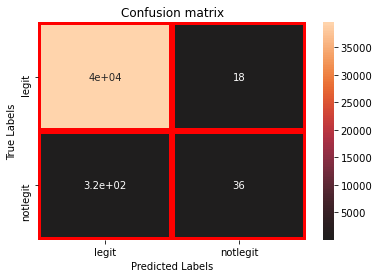

In [34]:
kx =['malignant','highly_malignant','rude','threat','abuse','loathe']
for p in kx:
    vect1 = CountVectorizer(ngram_range=(1,1))


    X = df.loc[:,('cleanedtest')]

    features = vect1.fit_transform(X)

    X = features
    y = df[p]
    X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
    for i in z1:
        i.fit(X_train,Y_train)
        y_pred = i.predict(x_test)
        print ('Final score {} = >' .format( i ) , accuracy_score(y_test,y_pred))
        print(classification_report(y_test, y_pred))

        conf_mat = confusion_matrix(y_test,y_pred)

        ax=plt.subplot()

        sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

        ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

        ax.set_title('Confusion matrix')
        ax.xaxis.set_ticklabels(['legit','notlegit'])
        ax.yaxis.set_ticklabels(['legit','notlegit'])
        plt.show()

In [ ]:
0